In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from statistics import mean
import numpy as np

In [2]:
from statistics import mean
def run100(data):
    Y = data.Outcome
    X = data.drop(columns='Outcome')
    mod_acc_arr = []
    rand_acc_arr = []
    for i in range(100):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)
        log_reg = LogisticRegression(max_iter = 1000)
        log_reg = log_reg.fit(X_train, Y_train)
        Y_pred = log_reg.predict(X_test)
        mod_acc_arr.append(metrics.accuracy_score(Y_test, Y_pred))
    return mean(mod_acc_arr)

In [3]:
#putting data into a dataframe
df = pd.read_csv('diabetes2a.csv')

In [4]:
#checking that it goes through
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,767.000000,759.000000,746.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.195567,20.779974,82.152815,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.206609,15.887976,116.102469,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,42.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

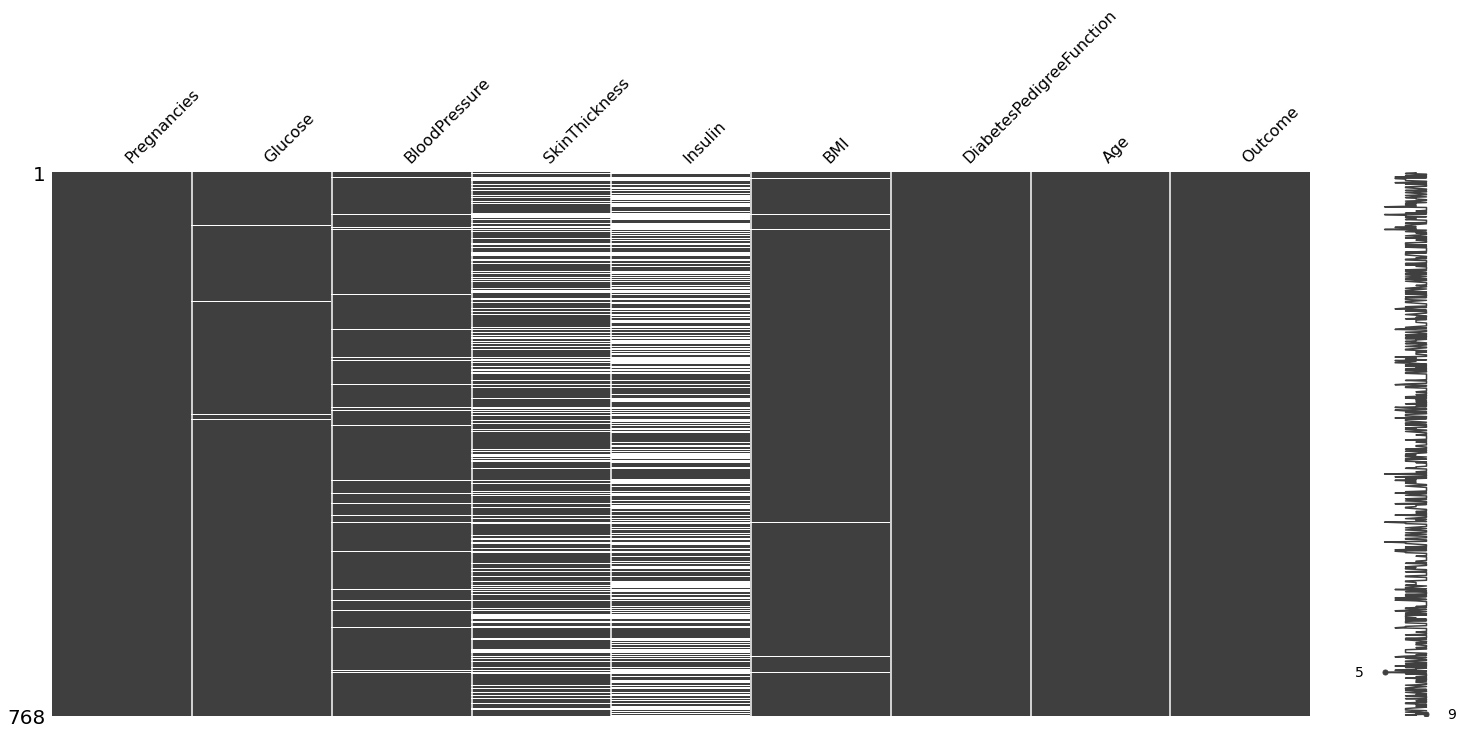

In [6]:
#a lot of these values being '0' is wrong, I will change occurrences of 0 to None and see what the data looks like again
import missingno as msno
df.loc[df.Insulin == 0, 'Insulin'] = None
df.loc[df.BMI == 0, 'BMI'] = None
df.loc[df.BloodPressure == 0, 'BloodPressure'] = None
df.loc[df.SkinThickness == 0, 'SkinThickness'] = None
df.loc[df.Glucose == 0, 'Glucose'] = None
msno.matrix(df)

In [7]:
# I don't want to lose the other helpful data from the dropped rows, so I'll replace them with the median of each attribute
df.fillna(df.median(), inplace=True)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


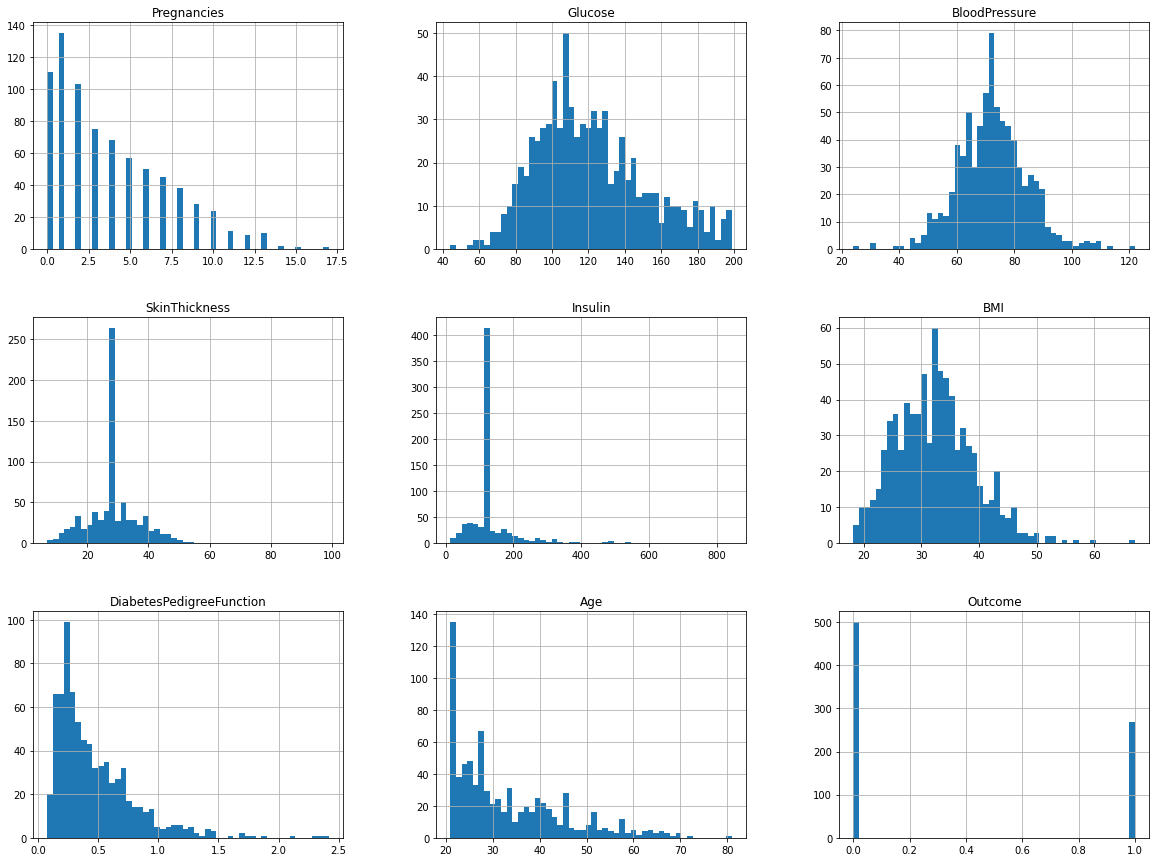

In [9]:
# These histograms obviously look goofy, but they are still better than having a bunch of 0 values skewing the data far down
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [10]:
# started getting ~77% which is a pretty good estimator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing as prp
Y = df.Outcome
X = df.drop(columns='Outcome')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)
log_reg = LogisticRegression(max_iter = 1000)
log_reg = log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
mod_pred = metrics.accuracy_score(Y_test, Y_pred) * 100
print(f'Model accuracy for a single run is at {mod_pred:.2f}%')
# here, I am testing the model's accuracy after multiple runs
mod100 = run100(df)
print(f'After 100 runs, model accuracy is at {mod100 * 100:.2f}%')

Model accuracy for a single run is at 81.17%
After 100 runs, model accuracy is at 76.76%


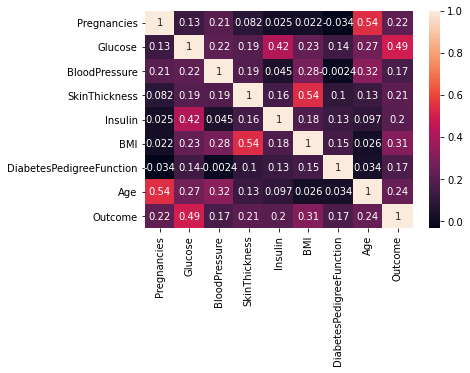

In [11]:
import seaborn as sn
import matplotlib.pyplot as plt
corr_mat = df.corr()
sn.heatmap(corr_mat, annot=True)
plt.show()

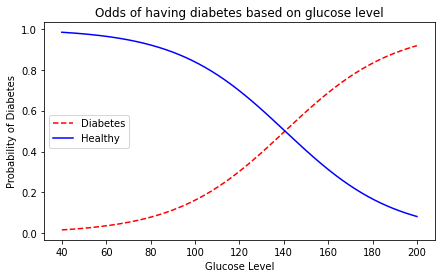

In [12]:
glucose_only = X.Glucose.to_numpy()
glucose_only = glucose_only.reshape(-1, 1)
log_reg = LogisticRegression()
log_reg.fit(glucose_only, Y)
plt.figure(figsize=(7, 4));
X_new = np.linspace(40, 200, 1000).reshape(-1, 1)
plt.xlabel("Glucose Level")
plt.ylabel("Probability of Diabetes")
y_proba = log_reg.predict_proba(X_new)
plt.title('Odds of having diabetes based on glucose level')
plt.plot(X_new, y_proba[:, 1], "r--", label = 'Diabetes')
plt.plot(X_new, y_proba[:, 0], "b-", label = 'Healthy')
plt.legend(loc="center left");

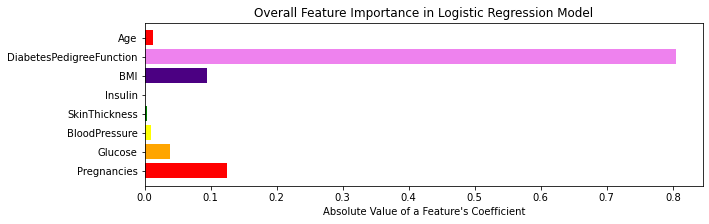

In [13]:
log_reg = LogisticRegression(max_iter = 1000)
Y = df.Outcome
X = df.drop(columns='Outcome')
log_reg = log_reg.fit(X, Y)
importance = log_reg.coef_[0]
importance = [abs(x) for x in importance]
plt.figure(figsize=(10, 3))
plt.title("Overall Feature Importance in Logistic Regression Model")
plt.xlabel("Absolute Value of a Feature's Coefficient")
ypos = np.arange(len(X.columns))
plt.yticks(ypos, X.columns)
plt.barh(ypos, importance, color=['red', 'orange', 'yellow',
                                  'green', 'blue', 'indigo', 'violet'])
plt.show()